# Convolutional network for image classification

The Objective of this exercise is to create a simple convolutional network for classifying images into 10 classes.

## Dataset

This is a dataset of 50,000 32x32 color training images and 10,000 test images labeled in 10 categories. 

For more information, please visit https://www.cs.toronto.edu/~kriz/cifar.html

## Classes
- 0 	airplane
- 1 	automobile
- 2 	bird
- 3 	cat
- 4 	deer
- 5 	dog
- 6 	frog
- 7 	horse
- 8 	ship
- 9 	truck


# Loading dataset
Again, this is a known dataset, so the cifar10 function is ready in keras.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

We will name the loaded classes according to the known order.

In [3]:
class_names=["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
num_classes = len(class_names)

# Data exploration
We don't know anything about the data yet, so let's take a look at it.

Sizes of numpy fields shows us:
* The training data is 50000
* Test data is 10000
* Images are 32x32 in size
* Images are in color because we have 3 RGB channels

In [4]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


We can dump the raw data for the first image. We can see that the values are stored in the uint(8) data type, which has a range of 0..255.

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

There should be 10 classes of images, so let's look at the unique values of the Y_train and Y_test matrices. We want all classes to be represented in them.

In [6]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


A good dataset is balanced. There should be a similar number of images in each class.

Let's plot a graph of class frequency.

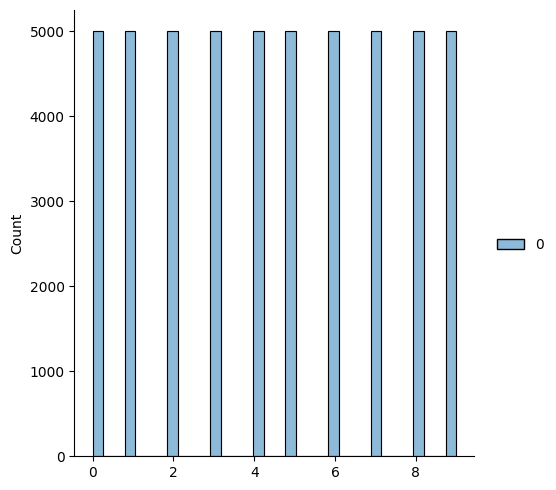

In [7]:
sns.displot(Y_train)

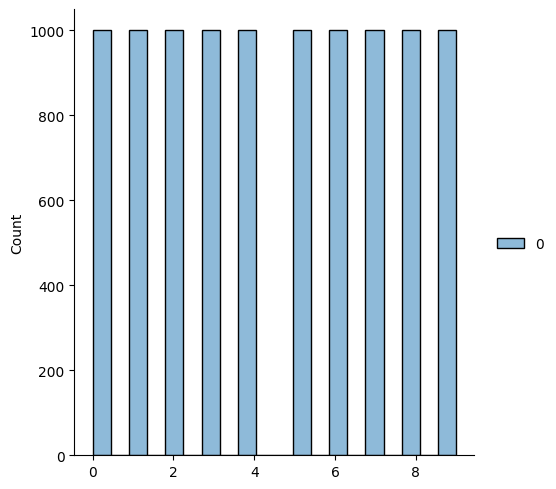

In [8]:
sns.displot(Y_test)

# Data visualization
These are images. That's why we will preview them.

In [9]:
def show_images (images, labels, rows=6, cols=10):
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))
    plt.subplots_adjust(bottom=0)
    
    for idx in range (0, rows * cols):
        ridx=idx//cols
        cidx=idx % cols        
        ax= axes[ridx, cidx]
        ax.axis("off")
        ax.imshow(images[idx])
        label = class_names[labels[idx][0]]
        ax.set_title(f"{label}")        

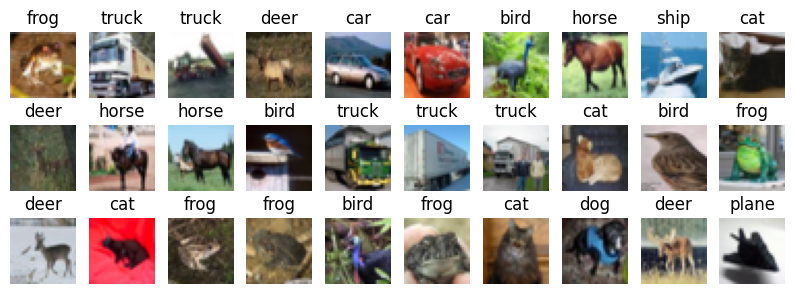

In [10]:
show_images(X_train, Y_train, 3, 10)

# Data preparation
The range of values is 0..255. Data type uint8.

Neural networks work better with standardized values around 0.

Therefore, we change the data type to float32 and standardize the data by dividing by 255. This gives us a range of 0..1

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

Control display of raw data.

In [12]:
X_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

Output categories in the input data are again stored as a class number.

For a neural network we will want to have the output data in vector form. 

We will perform binary encoding.

In [13]:
from keras.utils import to_categorical
num_classes = 10
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

Control display of output data.

In [14]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

# Convolutional neural network

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input

A convolutional neural network is forward/sequential.

In [16]:
model = Sequential()

Unlike classical networks, convolutional networks work with spatial contiguity of input data. Therefore, we will not convert the input data into a one-dimensional vector, but keep it in the form of a matrix.

In [17]:
model.add(Input(shape=(32,32,3)))

Add the first convolutional layer.
* filters - 32 convolution filters
* kernel_size - size of convolution filters 3 x 3
* padding - alignment of same leads to even padding left/right or up/down from input
* activation - ReLU activation function

In [18]:
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))

Add another convolutional layer.

In [19]:
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))

The pair of convolutional layers is followed by a maxpolling layer.

This reduces the size of the matrices using a 2x2 pool.

In [20]:
model.add(MaxPooling2D(pool_size=(2,2)))

To make our neural network more resistant to overfitting, we add a Dropout layer.

The Dropout layer randomly sets the input neurons to 0, which helps prevent the network from overfitting to the training data.

Inputs that are not set to 0 are scaled by 1 / (1 - rate) so that the sum of all inputs remains unchanged.

In [21]:
model.add(Dropout(0.3))

Then we add a second block of convolutional, maxpooling and dropout layers.

In [22]:
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

Third block

In [23]:
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

After a series of convolutional layers, we need to build a part of the network that will convert the values into categories.

The Flatten layer flattens the existing multidimensional arrays to 1 dimension.

In [24]:
model.add(Flatten())

Classification part with fully connected layers with relu activation functions.

In [25]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

The last layer has 10 output neurons because we have 10 classes of images.

The softmax activation function is used to convert the values into probabilities.

In [26]:
model.add(Dense(num_classes, activation='softmax')) 

View the model.

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from keras_visualizer import visualizer 
visualizer(model, file_format='png', view=True)

ValueError: [Keras Visualizer] Error while visualizing: <class 'Exception'>

# Learning

Set the learning parameters.

In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

We will create an Earlystop so that we don't unnecessarily train an already trained network.

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='accuracy', patience=30)

Let's start training the network.

In [ ]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=15, callbacks=[early_stop])

Save the trained network to a file for later use.

In [ ]:
model.save('classification_model_cifar10.keras')

# History of learning
Again, it is good to look at the learning process to see if the value of the cost function is decreasing.

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.legend(loc="right")
plt.title('Loss, accuracy')
plt.ylabel('Loss, accuracy')
plt.xlabel('Počet epoch')
plt.show()

# Model Verification
We need to validate the trained model on the training data.

In [ ]:
model = keras.models.load_model('classification_model_cifar10.keras')

In [ ]:
Y_pred = model.predict(X_test)

Let's compare the prediction for the first image

In [ ]:
Y_pred[0]

with the correct answer.

In [ ]:
Y_test[0]

We get the result as a vector of truth probabilities. Therefore, we get one answer by finding the maximum.

In [ ]:
Y_pred_best_answer = np.argmax(Y_pred, axis=-1)
Y_pred_best_answer

Do the same with the test answers (reality).

Ideally, both fields are equal.

In [ ]:
Y_test_best_answer=np.argmax(Y_test, axis=-1)
Y_test_best_answer

Print confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf_matrix=confusion_matrix(Y_test_best_answer, Y_pred_best_answer)
sns.heatmap(cf_matrix, annot=True)

View the evaluation parameters
* R2
* Accuracy

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test_best_answer, Y_pred_best_answer)
print('R2 score: {}'.format(r2))

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print (f"Loss function: {scores[0]}")
print (f"Accuracy: {scores[1]}")

We can view the accuracies for each image class.

In [ ]:
class_correct, class_count = [0]*10, [0]*10

for i in range(Y_test.shape[0]):    
    if (Y_test_best_answer[i] == Y_pred_best_answer[i]):
        class_correct[Y_test_best_answer[i]] +=1
    class_count[Y_test_best_answer[i]] += 1
    
for i in range(10):
    print (f"Accuracy for {class_names[i]}: {class_correct[i]/class_count[i]:.2%}") 

It can be interesting to see the wrong answers.

In [ ]:
def show_wrong_predictions(X_test, Y_test, Y_pred, rows=5, cols=5):        
    idx = 0
    max_examples = rows * cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows), constrained_layout=True)    
    for i in range(Y_test.shape[0]):    
        if (Y_test[i] != Y_pred[i]):                                    
            ridx=idx // cols
            cidx=idx % cols            
            ax = axes[ridx, cidx]
            ax.axis("off")
            ax.imshow(X_test[i].reshape(32,32,3), cmap="gray_r")
            ax.set_title(f"{class_names[Y_test[i]]} != {class_names[Y_pred[i]]}")
            idx +=1
            if (idx == max_examples):
                break

In [ ]:
show_wrong_predictions(X_test, Y_test_best_answer, Y_pred_best_answer, 2, 10)